In [15]:
import numpy as np

def rescaleNormalization(dataArray):
    min = dataArray.min()
    denom = dataArray.max() - min
    newValues = []
    for x in dataArray:
        newX = (x - min) / denom
        newValues.append(newX)
    return newValues

def rescaleMatrix(dataMatrix):
    colCount = len(dataMatrix[0])
    rowCount = len(dataMatrix)
    newMatrix = np.zeros(dataMatrix.shape) 
    for i in range(0, colCount):
        min = dataMatrix[:,i].min()
        denom = dataMatrix[:,i].max() - min
        for k in range(0, rowCount):
            newX = (dataMatrix[k,i] - min) / denom
            newMatrix[k,i] = newX
    return newMatrix

#
def dataNormalization(dataMatrix):
    colCount = len(dataMatrix[0])
    rowCount = len(dataMatrix)
    newMatrix = np.zeros(dataMatrix.shape)
    for i in range(0, colCount):
        min = dataMatrix[:,i].min()
        max = dataMatrix[:,i].max()
        mean = dataMatrix[:,i].mean()
        sd = abs(mean - min) + abs(max - mean)
        for k in range(0, rowCount):
            newX = (dataMatrix[k,i] - mean) / sd
            newMatrix[k,i] = newX
    return newMatrix
    
def meanNormalization(dataArray):
    mean = np.mean(dataArray)
    denom = dataArray.max() - dataArray.min()
    newValues = []
    for x in dataArray:
        newX = (x - mean) / denom
        newValues.append(newX)
    return newValues


In [12]:
from pandas import read_table

def download_data(fileLocation, fields):
    '''
    Downloads the data for this script into a pandas DataFrame. Uses columns indices provided
    '''

    frame = read_table(
        fileLocation,
        
        # Specify the file encoding
        # Latin-1 is common for data from US sources
        encoding='latin-1',
        #encoding='utf-8',  # UTF-8 is also common

        # Specify the separator in the data
        sep=',',            # comma separated values

        # Ignore spaces after the separator
        skipinitialspace=True,

        # Generate row labels from each row number
        index_col=None,

        # Generate column headers row from each column number
        header=0,          # use the first line as headers

        usecols=fields
    )

    # Return the entire frame
    return frame

In [25]:
import numpy as np
sat = download_data('sat.csv', [1, 2, 4]).values # three columns: MATH SAT, VERB SAT, UNI. GPA  # convert frame to matrix
alpha = 0.1

sat1 = rescaleMatrix(sat) # please replace this code with your own codes
sat2 = dataNormalization(sat)
print(sat1)
print(sat2)
# training data;
satTrain = sat[0:60, :]

mean = sat[:,1].mean()


satTest = sat[60:len(sat),:]

theta = np.zeros(3) 

xValues = np.ones((60, 3))

xValues[:, 1:3] = satTrain[:, 0:2]
yValues = satTrain[:, 2]

x = np.transpose(xValues)

hyp = np.dot(xValues, theta)

m = len(yValues)


loss = hyp - m 
cost = np.sum(loss**2)/(2*m)


#gredient = np.dot(x, loss) / m


#theta = theta - alpha * gradient



[[0.62871287 0.43253968 0.83236994]
 [0.20792079 0.12698413 0.47976879]
 [0.33168317 0.09126984 0.1849711 ]
 [0.83663366 0.48412698 0.80346821]
 [0.37623762 0.23015873 0.80346821]
 [0.22772277 0.02380952 0.16763006]
 [0.28217822 0.26984127 0.1849711 ]
 [0.21287129 0.22222222 0.09248555]
 [0.17821782 0.40873016 0.5433526 ]
 [0.5        0.44047619 0.71676301]
 [0.83168317 0.67063492 0.87283237]
 [0.25742574 0.44444444 0.26589595]
 [0.43564356 0.4047619  0.6416185 ]
 [0.50990099 0.57142857 0.94219653]
 [0.62376238 0.5515873  0.86705202]
 [0.82673267 0.64285714 0.76300578]
 [0.92574257 0.80952381 0.95375723]
 [0.97029703 0.68253968 0.8150289 ]
 [0.23762376 0.08333333 0.0982659 ]
 [0.2029703  0.27380952 0.16763006]
 [0.37128713 0.41269841 0.69942197]
 [0.41089109 0.32539683 0.6416185 ]
 [0.45049505 0.5515873  0.69364162]
 [0.50990099 0.30952381 0.74566474]
 [0.91089109 0.95634921 0.88439306]
 [1.         1.         1.        ]
 [0.31683168 0.23015873 0.1849711 ]
 [0.22772277 0.10714286 0.07

In [32]:
import numpy as np
# X          - single array/vector
# y          - single array/vector
# theta      - single array/vector
# alpha      - scalar
# iterations - scarlar

def gradientDescent(X, y, theta, alpha, numIterations):
    '''
    # This function returns a tuple (theta, Cost array)
    '''
    m = len(y)
    arrCost =[];
    transposedX = np.transpose(X) # transpose X into a vector  -> XColCount X m matrix
    for interation in range(0, numIterations):
        ################PLACEHOLDER3 #start##########################
        #: write your codes to update theta, i.e., the parameters to estimate. 
        hyp =  np.dot(X, theta)
        residualError =  hyp - y
        gradient =  np.dot(transposedX, residualError) / m
        change = [alpha * x for x in gradient]
        theta = np.subtract(theta, change)  # theta = theta - alpha * gradient
        ################PLACEHOLDER3 #end##########################

        ################PLACEHOLDER4 #start##########################
        # calculate the current cost with the new theta; 
        atmp =  np.sum(residualError**2) / (m) 
        print(atmp)
        arrCost.append(atmp)
        # cost = (1 / m) * np.sum(residualError ** 2)
        ################PLACEHOLDER4 #start##########################

    return theta, arrCost

0.44083163486919036
0.13836047896851486
0.06367888655248934
0.04442993272153376
0.03880170826827873
0.03662992389372196
0.03542593912566176
0.03456558947456286
0.03388000726418117
0.03331351565062049
0.03284025090250973
0.03244356970631168
0.032110736305087505
0.031831365053608174
0.03159681670776061
0.03139986235672107
0.031234442820050723
0.031095476844030412
0.030978702648900458
0.030880545612321505
0.030798007429605694
0.030728573179929834
0.030670133385262487
0.03062091863828446
0.030579444771179833
0.030544466865347633
0.030514940676460964
0.03048999027922412
0.03046888092897753
0.03045099629900079
0.030435819387989796
0.030422916505940128
0.030411923842084406
0.030402536198561213
0.030394497540619802
0.030387593070468264
0.03038164257909772
0.03037649487002572
0.03037202308212615
0.030368120766579906
0.03036469859635432
0.03036168160622465
0.030359006877794678
0.03035662159776651
0.030354481429278036
0.03035254914583022
0.03035079348546523
0.030349188189682987
0.0303477111973096

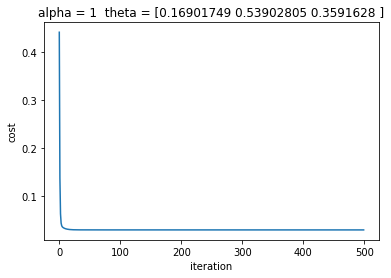

results: 0.17475275147236569 (0.12723652937137223)


In [46]:
from download_data import download_data
import numpy as np
import matplotlib.pyplot as plt
from GD2 import gradientDescent
from dataNormalization import rescaleMatrix
# Starting codes for ha3 of CS596.

#NOTICE: Fill in the codes between "%PLACEHOLDER#start" and "PLACEHOLDER#end"
# There are two PLACEHODERS IN THIS SCRIPT
# parameters

################PLACEHOLDER1 #start##########################
# test multiple learning rates and report their convergence curves. 
ALPHA = 1
MAX_ITER = 500

################PLACEHOLDER1 #end##########################

#% step-1: load data and divide it into two subsets, used for training and testing
sat = download_data('sat.csv', [1, 2, 4]).values # three columns: MATH SAT, VERB SAT, UNI. GPA  # convert frame to matrix

################PLACEHOLDER2 #start##########################
# Normalize data
sat = rescaleMatrix(sat) # please replace this code with your own codes
################PLACEHOLDER2 #end##########################

# training data;
satTrain = sat[0:60, :]
# testing data; 
satTest = sat[60:len(sat),:]

#% step-2: train a linear regression model using the Gradient Descent (GD) method
# ** theta and xValues have 3 columns since have 2 features: y = (theta * x^0) + (theta * x^1) + (theta * x^2)
theta = np.zeros(3) 

xValues = np.ones((60, 3)) 
xValues[:, 1:3] = satTrain[:, 0:2]
yValues = satTrain[:, 2]
# call the GD algorithm, placeholders in the function gradientDescent()
[theta, arrCost] = gradientDescent(xValues, yValues, theta, ALPHA, MAX_ITER)

#visualize the convergence curve
plt.plot(range(0,len(arrCost)),arrCost);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}  theta = {}'.format(ALPHA, theta))
plt.show()

#% step-3: testing
testXValues = np.ones((len(satTest), 3)) 
testXValues[:, 1:3] = satTest[:, 0:2]
tVal =  testXValues.dot(theta)
 
#% step-4: evaluation
# calculate average error and standard deviation
tError = np.sqrt([x**2 for x in np.subtract(tVal, satTest[:, 2])])
print('results: {} ({})'.format(np.mean(tError), np.std(tError)))

